In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [3]:
def try_kmeans(df, cluster_range):
    
    sse, db, slc = {}, {}, {}
    for k in range(2, 10):
        kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(df)
        clusters = kmeans.labels_
        sse[k] = kmeans.inertia_
        slc[k] = silhouette_score(df, clusters)
     
    return sse, slc

def plot_kmeans_and_silhouette(sse, slc, cluster_range):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4), sharex=False, sharey=False)

    # Visualize Silhouette score
    ax1.plot(list(slc.keys()), list(slc.values()), marker='o')
    ax1.set_title('Silhouette score')
    ax1.set_xlabel('Number of Clusters', fontsize=8)
    ax1.set_ylabel('Silhouette Score', fontsize=8)

    # Visaulize kmeans cluster
    ax2.plot(list(sse.keys()), list(sse.values()), marker='o')
    ax2.set_title('Kmeans SSE')
    ax2.set_xlabel('Number of Clusters', fontsize=8)
    ax2.set_ylabel('SSE', fontsize=8)
    plt.show()

# 1. Administrative duration vs Bounce Rate

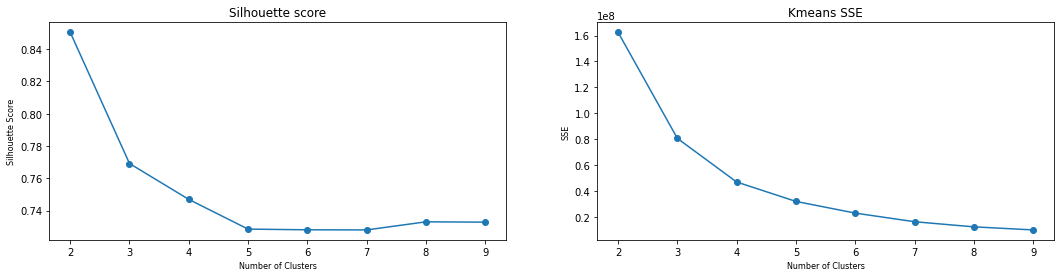

In [4]:
cluster_cols = ['Administrative_Duration', 'BounceRates']
cluster_range = list(range(2, 11))
sse, slc = try_kmeans(df[cluster_cols], cluster_range)
plot_kmeans_and_silhouette(sse, slc, cluster_range)

Using both elbow curve and Silhouette score, we can take num_cluser as 4

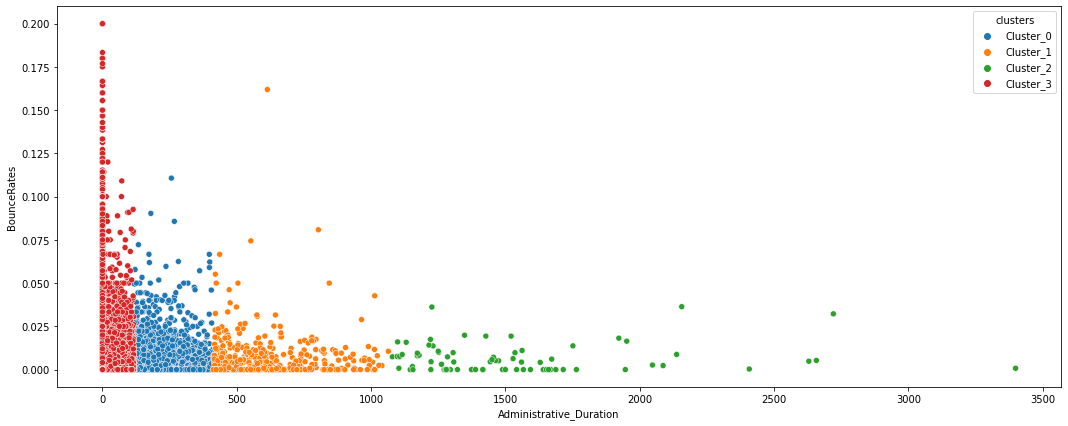

In [5]:
# Use scatter plot to visualize the clusters
kmeans = KMeans(n_clusters = 4, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(df[cluster_cols])
df["clusters"] =['Cluster_' + str(x) for x in  kmeans.labels_.tolist()]
df.sort_values(by='clusters', inplace=True)

plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x='Administrative_Duration', y='BounceRates', hue = 'clusters')
plt.show()

## Conclusion
From the scatter plot, we observe that as the `Administrative Duration` increases, the `Bounce Rates` decreases. This phenomenon is captured in clustering as well. We see that we have 4 clusters, and each cluster is within specific region of
`Administrative Duration` and `Bounce Rates`.

# 2. Administrative duration vs Exit Rate

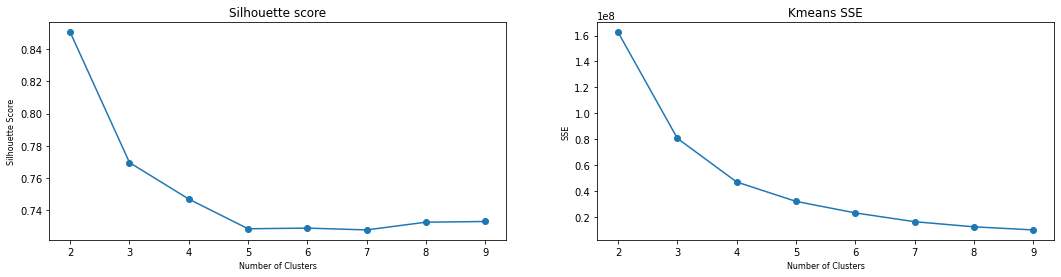

In [6]:
cluster_cols = ['Administrative_Duration', 'ExitRates']
cluster_range = list(range(2, 11))
sse, slc = try_kmeans(df[cluster_cols], cluster_range)
plot_kmeans_and_silhouette(sse, slc, cluster_range)

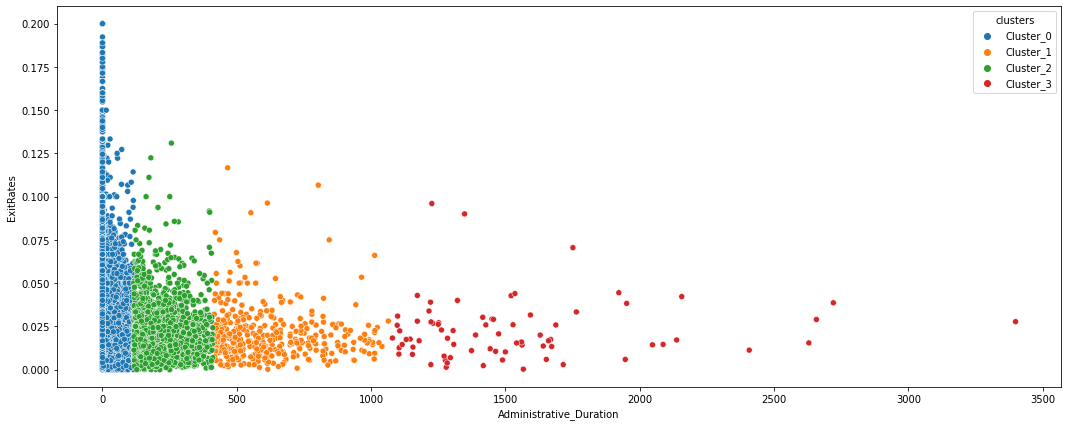

In [7]:
# Use scatter plot to visualize the clusters
kmeans = KMeans(n_clusters = 4, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(df[cluster_cols])
df["clusters"] =['Cluster_' + str(x) for x in  kmeans.labels_.tolist()]
df.sort_values(by='clusters', inplace=True)

plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x='Administrative_Duration', y='ExitRates', hue = 'clusters')
plt.show()

## Conclusion
From the scatter plot, we observe that as the Administrative Duration increases, the Exit Rates decreases. This behaviour is very similar to the behaviour,we observed with Bounce Rates.

Clusters also reflect the same. We see that we have 4 clusters, and each cluster is within specific region of Administrative Duration and Exit Rates.